## Final Project Submission

Please fill out:
* Student name: MARTIN MWANGI
* Student pace: FULL TIME
* Scheduled project review date/time: 
* Instructor name: ANTONNY MUIKO
* Blog post URL:


## Business Problem
Voice of Kenya now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

## Business Understanding
The business problem presented by Voice of Kenya is to establish their own movie studio to compete within the movie market both locally and globally. For Voice of Kenya to succed in this business, some questions needs answers:
* Are movies really profitable, do they really make money
* What kind of the movie genre will be the most successful
* What is the budget of producing a movie from start to airing
* Who are my competitor and how established are they in the market
  
Answering this questions will help the Voice of Kenya to make decisions

## Data Understanding
After carefully analysising the data provided in relation to the business problem and the business understanding question. I have selected the following datasets together with the columns that will be used in each particular dataset. The primary key is movie_title

1. [im.db.zip](https://github.com/learn-co-curriculum/dsc-phase-2-project-v3/tree/main/zippedData)(movie_basic i.e movie_title and genres)
2. [tn.movie_budgets.csv.gz](https://github.com/learn-co-curriculum/dsc-phase-2-project-v3/blob/main/zippedData/tn.movie_budgets.csv.gz)(movie_title, production_budget, domestic_gross, worldwide_gross)
3. [bom.movie_gross.csv.gz](https://github.com/learn-co-curriculum/dsc-phase-2-project-v3/blob/main/zippedData/bom.movie_gross.csv.gz)(movie_title, studio)


## Data preparation
The three dataset will go through sanity check first thats is data cleaning, it includes:

1. Converting some columns that are are supposed to be numerical i.e production_budget, domestic_gross_y, worldwide_gross from object dtype to float dtype
2. Check the null or missing values and fill them, and drop where need be
3. Check and drop duplicates
4. Check and drop outliers
   
After the sanity check then i will merge the datasets 2 by 2 i.e will merge two datasets, then i will take the merged dataset and merge with the third dataset to have one dataset.

In [28]:
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns
import sklearn as sk
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
import zipfile

# define the files path to extract and save the file after extract
zip_path = "zippedData/im.db.zip"
idmb_unzip = "zippedData/unzip idmb"
# unzip the datafile
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(idmb_unzip)


In [30]:
# connecting our database
conn = sqlite3.connect("zippedData/unzip idmb/im.db")
# retriving our tables
movie_basics = pd.read_sql_query("SELECT* FROM movie_basics", conn)
movie_ratings = pd.read_sql_query("SELECT* FROM movie_ratings", conn)
# closing the connection



In [31]:
# connecting our datasets
# in the movie basic table i just need two columns the genre and primary title
conn = sqlite3.connect("zippedData/unzip idmb/im.db")
q = """
SELECT
    primary_title,
    genres
FROM movie_basics;
"""
idmb_unzip = pd.read_sql(q, conn)


In [32]:
# cheking the info our movie basic column
idmb_unzip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   primary_title  146144 non-null  object
 1   genres         140736 non-null  object
dtypes: object(2)
memory usage: 2.2+ MB


## Data analysis
1. Checking missing values drop them or fill them
2. Checking for duplicates
3. Checking for outliers but in this dataset we have object dtype so we will ommit checking the outliers

In [33]:
# checking of null values
idmb_unzip.isna().sum()

primary_title       0
genres           5408
dtype: int64

In [34]:
# our dataset contains 5408 missing values. This is a very small percentage so we can drop the missing value rows
idmb_unzip1= idmb_unzip.dropna()
idmb_unzip1

,primary_title,genres
0,Sunghursh,"Action,Crime,Drama"
1,One Day Before the Rainy Season,"Biography,Drama"
2,The Other Side of the Wind,Drama
3,Sabse Bada Sukh,"Comedy,Drama"
4,The Wandering Soap Opera,"Comedy,Drama,Fantasy"
...,...,...
146138,The Secret of China,"Adventure,History,War"
146139,Kuambil Lagi Hatiku,Drama
146140,Rodolpho Teóphilo - O Legado de um Pioneiro,Documentary
146141,Dankyavar Danka,Comedy


In [35]:
# confirming if our dataset contains any missing value
idmb_unzip1.isna().sum()

primary_title    0
genres           0
dtype: int64

In [36]:
# Lets check for duplicates
idmb_unzip1.duplicated().sum()

1612

In [37]:
# the dataset contains 1612 duplicates we drop them keeping first
cleaned_imdb = idmb_unzip1.drop_duplicates()
cleaned_imdb

,primary_title,genres
0,Sunghursh,"Action,Crime,Drama"
1,One Day Before the Rainy Season,"Biography,Drama"
2,The Other Side of the Wind,Drama
3,Sabse Bada Sukh,"Comedy,Drama"
4,The Wandering Soap Opera,"Comedy,Drama,Fantasy"
...,...,...
146138,The Secret of China,"Adventure,History,War"
146139,Kuambil Lagi Hatiku,Drama
146140,Rodolpho Teóphilo - O Legado de um Pioneiro,Documentary
146141,Dankyavar Danka,Comedy


In [38]:
# confirming duplicates
cleaned_imdb.duplicated().sum()

0

Our imdb dataset is clean with a new name as cleaned_imdb now we work for our csv data that  bom.movie_gross.csv. we start by reading it

In [39]:
bom_movie = pd.read_csv("zippedData/bom.movie_gross.csv")
bom_movie.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [40]:
# checking how our dataset looks like
bom_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


## Data analysis
1. First we will convert the foreign_gross from object dtype to float dtype
2. Check the null or missing values and fill them, and drop where need be
3. Check and drop duplicates
4. Check and drop outliers

In [41]:
#checking the colums
bom_movie.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [42]:
# we need the foreign gross column in as a float dtype. we need to convert it from object to float dtype 
bom_movie['foreign_gross'] = bom_movie['foreign_gross'].str.replace(',', '').astype(float)

In [43]:
bom_movie.describe()

,domestic_gross,foreign_gross,year
count,3.359000e+03,2.037000e+03,3387.000000
mean,2.874585e+07,7.487281e+07,2013.958075
std,6.698250e+07,1.374106e+08,2.478141
min,1.000000e+02,6.000000e+02,2010.000000
25%,1.200000e+05,3.700000e+06,2012.000000
50%,1.400000e+06,1.870000e+07,2014.000000
75%,2.790000e+07,7.490000e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


In [44]:
# checking for missing values
bom_movie.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [45]:
# The number of missing values in foreign _gross is a huge percentage to be dropped
# We calculate the mean value and use it to fill the missing values
mean_value = bom_movie['foreign_gross'].mean()
mean_value

74872810.15046637

In [46]:
# Filling the missing values using the mean
bom_movie['foreign_gross'] = bom_movie['foreign_gross'].fillna(mean_value)

In [47]:
# We calculate the mean value and use it to fill the missing values 
mean_value = bom_movie['domestic_gross'].mean()
mean_value

28745845.06698422

In [48]:
#Filling the missing values using the mean
bom_movie['domestic_gross'] = bom_movie['domestic_gross'].fillna(mean_value)

In [49]:
# dropping miss values in studio
bom_movie1 = bom_movie.dropna(subset=['studio'])
bom_movie1

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,6.520000e+08,2010
1,Alice in Wonderland (2010),BV,334200000.0,6.913000e+08,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,6.643000e+08,2010
3,Inception,WB,292600000.0,5.357000e+08,2010
4,Shrek Forever After,P/DW,238700000.0,5.139000e+08,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,7.487281e+07,2018
3383,Edward II (2018 re-release),FM,4800.0,7.487281e+07,2018
3384,El Pacto,Sony,2500.0,7.487281e+07,2018
3385,The Swan,Synergetic,2400.0,7.487281e+07,2018


In [50]:
bom_movie1.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [51]:
# Checking for duplicates, bom_movie1 has no duplicates
bom_movie1.duplicated().sum()

0

<Axes: xlabel='domestic_gross'>

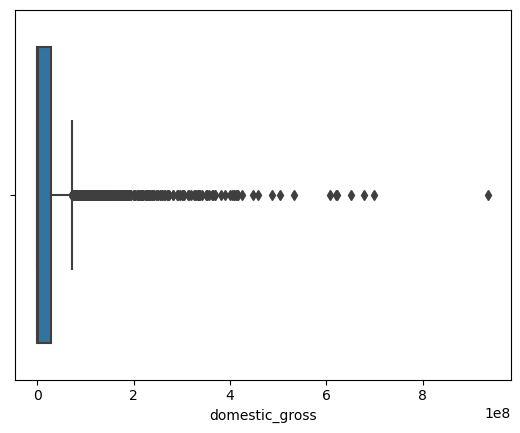

In [52]:
# Checking for outliers domestic_gross column using the boxplot 
sns.boxplot(x = bom_movie1['domestic_gross'])

In [53]:
# i will use the interquatile range to calculate and filter out outliers
# Calculate the IQR
Q1 = bom_movie1['domestic_gross'].quantile(0.25)
Q3 = bom_movie1['domestic_gross'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
fi_bom_movie = bom_movie1[(bom_movie1['domestic_gross'] >= lower_bound) & (bom_movie1['domestic_gross'] <= upper_bound)]
bom_movie1.reset_index(drop=True, inplace=True)


<Axes: xlabel='domestic_gross'>

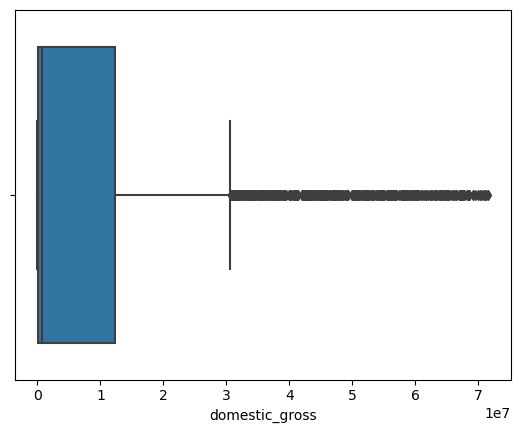

In [54]:
# Checking outliers for the domestic_gross column after filtering out, a way of confirming
sns.boxplot(x = fi_bom_movie ['domestic_gross'])

<Axes: xlabel='foreign_gross'>

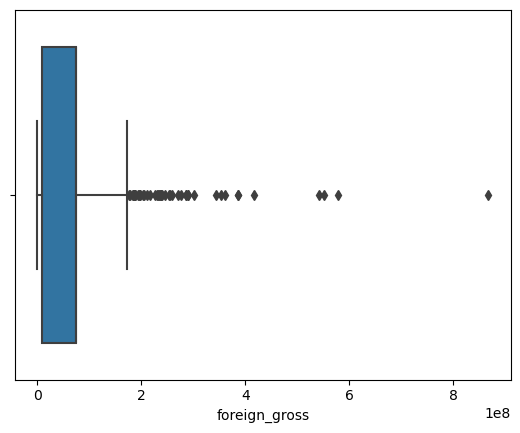

In [55]:
# Checking out outliers in the foreign_gross column using the boxplot 
sns.boxplot(x=fi_bom_movie['foreign_gross'])

In [56]:
# i will use the interquatile range to calculate and filter out outliers
# Calculate the IQR
Q1 = fi_bom_movie['foreign_gross'].quantile(0.25)
Q3 = fi_bom_movie['foreign_gross'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
cleaned_bom_movie = fi_bom_movie[(fi_bom_movie['foreign_gross'] >= lower_bound) & (fi_bom_movie['foreign_gross'] <= upper_bound)]
cleaned_bom_movie

,title,studio,domestic_gross,foreign_gross,year
34,The Sorcerer's Apprentice,BV,63200000.0,1.521000e+08,2010
44,Step Up 3-D,BV,42400000.0,1.169000e+08,2010
48,Legend of the Guardians: The Owls of Ga'Hoole,WB,55700000.0,8.440000e+07,2010
49,The Wolfman,Uni.,62000000.0,7.780000e+07,2010
50,The Bounty Hunter,Sony,67099999.0,6.930000e+07,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,7.487281e+07,2018
3383,Edward II (2018 re-release),FM,4800.0,7.487281e+07,2018
3384,El Pacto,Sony,2500.0,7.487281e+07,2018
3385,The Swan,Synergetic,2400.0,7.487281e+07,2018


<Axes: xlabel='foreign_gross'>

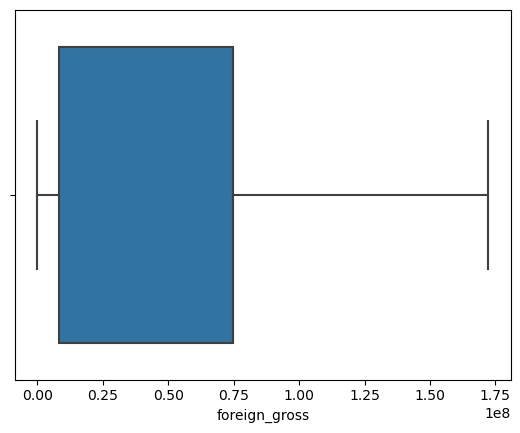

In [57]:
# Checking outliers for the foreign_gross column after filtering out, a way of confirming
sns.boxplot(x=cleaned_bom_movie['foreign_gross'])

In [58]:
df = pd.read_csv("zippedData/tn.movie_budgets.csv")
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [59]:
#checking the shape of the datasets it 5782 contains rows and 6 columns
df.shape

(5782, 6)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


## Data analysis
1. First we will convert the production_budget, domestic_gross, worldwide_gross from object dtype to float dtype
2. Check the null or missing values and fill them, and drop where need be
3. Check and drop duplicates
4. Check and drop outliers

To convert the production_budget, domestic_gross, worldwide_gross we have to get rid of commas and the dollar signs.The reason been to work with numbers in calculations or data analysis, you need to get rid of these symbols since computers will nottreat them as numbers.

In [61]:
# we defined a function
def remove_dollar_sign(x):
    return x.replace('$', '').replace(',', '')

In [62]:
# defined the columns we need to remove sysmbols and commas
remove_columns = ['production_budget', 'domestic_gross', 'worldwide_gross']
# we use for loops to iterate through the columns
for column in remove_columns:
    df[column] = df[column].apply(remove_dollar_sign)

In [63]:
# confirming if our columns contains the signs, good we are okay
df.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875


In [64]:
# first we convert the production_budget, domestic_gross, worldwide_gross from object dtype to flaat dtype
# converting the production_budget
df['production_budget'] = df['production_budget'].str.replace(',', '').astype(float)

In [65]:
# converting the domestic_gross
df['domestic_gross'] = df['domestic_gross'].str.replace(',', '').astype(float)

In [66]:
#converting the worldwide_gross
df['worldwide_gross'] = df['worldwide_gross'].str.replace(',', '').astype(float)

In [67]:
#succesfully converted to float dtype
df.dtypes

id                     int64
release_date          object
movie                 object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object

In [68]:
# checking the stats i.e mean, median, mode, count e.t.c
df.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


### performing sanity check

In [69]:
#checking missing values, drop, or fill them.
df.isna().sum() # our data has no missing values

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [70]:
# checking for duplicates
df.duplicated().sum() # no duplicates

0

<Axes: xlabel='production_budget'>

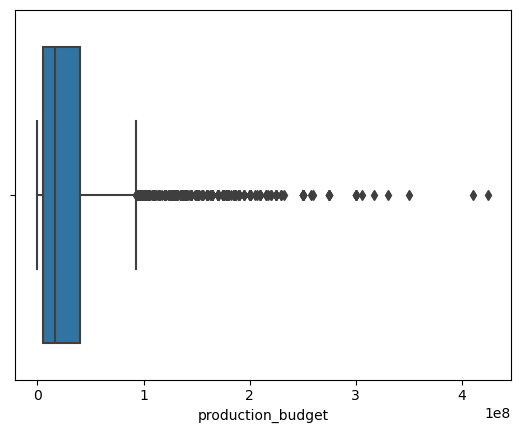

In [71]:
# checking for outliers using sns library and box plot
sns.boxplot(x =df['production_budget'])

In [72]:
# i will use the interquatile range to calculate and filter out outliers
# Calculate the IQR
Q1 = df['production_budget'].quantile(0.25)
Q3 = df['production_budget'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df1 = df[(df['production_budget'] >= lower_bound) & (df['production_budget'] <= upper_bound)]
df1

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
431,32,"Feb 14, 2008",The Spiderwick Chronicles,92500000.0,71195053.0,162839667.0
432,33,"Nov 5, 2004",The Incredibles,92000000.0,261441092.0,614726752.0
433,34,"Feb 14, 2013",A Good Day to Die Hard,92000000.0,67349198.0,304249198.0
434,35,"Apr 9, 2004",The Alamo,92000000.0,22406362.0,23911362.0
435,36,"Dec 22, 1995",Cutthroat Island,92000000.0,10017322.0,18517322.0
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.0
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,240495.0
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1338.0
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.0


<Axes: xlabel='production_budget'>

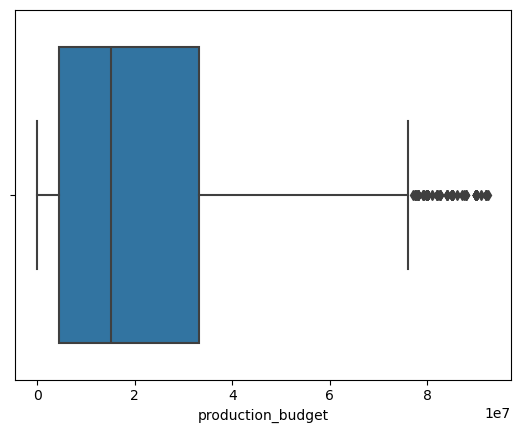

In [73]:
sns.boxplot(x =df1['production_budget'])

<Axes: xlabel='domestic_gross'>

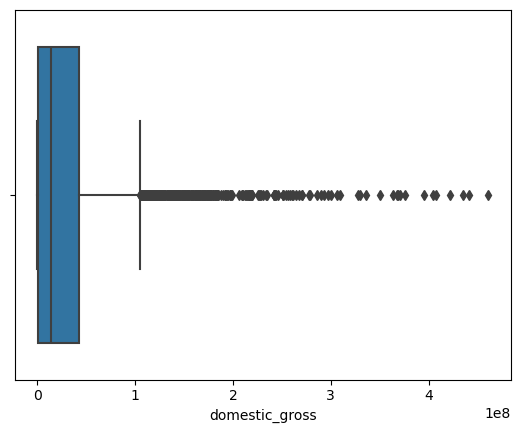

In [74]:
sns.boxplot(x =df1['domestic_gross'])

In [75]:
# i will use the interquatile range to calculate and filter out outliers
# Calculate the IQR
Q1 = df1['domestic_gross'].quantile(0.25)
Q3 = df1['domestic_gross'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df2 = df1[(df1['domestic_gross'] >= lower_bound) & (df1['domestic_gross'] <= upper_bound)]
df2

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
431,32,"Feb 14, 2008",The Spiderwick Chronicles,92500000.0,71195053.0,162839667.0
433,34,"Feb 14, 2013",A Good Day to Die Hard,92000000.0,67349198.0,304249198.0
434,35,"Apr 9, 2004",The Alamo,92000000.0,22406362.0,23911362.0
435,36,"Dec 22, 1995",Cutthroat Island,92000000.0,10017322.0,18517322.0
436,37,"Dec 25, 2013",The Secret Life of Walter Mitty,91000000.0,58236838.0,187861183.0
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.0
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,240495.0
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1338.0
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.0


<Axes: xlabel='domestic_gross'>

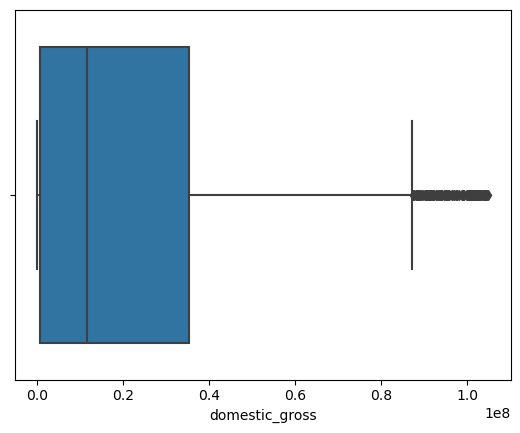

In [76]:
sns.boxplot(x =df2['domestic_gross'])

<Axes: xlabel='worldwide_gross'>

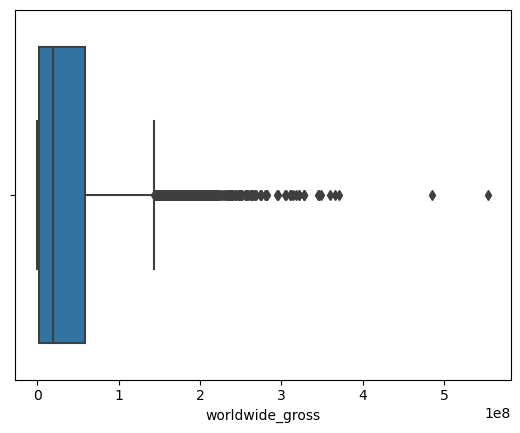

In [77]:
sns.boxplot(x =df2['worldwide_gross'])

In [78]:
# i will use the interquatile range to calculate and filter out outliers
# Calculate the IQR
Q1 = df2['worldwide_gross'].quantile(0.25)
Q3 = df2['worldwide_gross'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
tn_movie = df2[(df2['worldwide_gross'] >= lower_bound) & (df2['worldwide_gross'] <= upper_bound)]
tn_movie

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
434,35,"Apr 9, 2004",The Alamo,92000000.0,22406362.0,23911362.0
435,36,"Dec 22, 1995",Cutthroat Island,92000000.0,10017322.0,18517322.0
466,67,"Nov 21, 2001",Spy Game,90000000.0,62362560.0,143049560.0
468,69,"Mar 10, 2000",Mission to Mars,90000000.0,60874615.0,106000000.0
470,71,"Dec 17, 1999",Bicentennial Man,90000000.0,58220776.0,87420776.0
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.0
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,240495.0
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1338.0
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.0


<Axes: xlabel='worldwide_gross'>

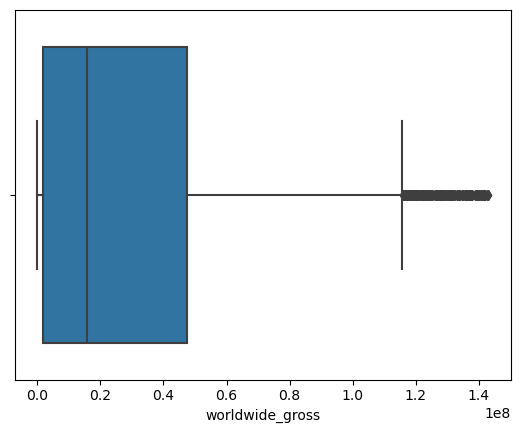

In [79]:
sns.boxplot(x =tn_movie['worldwide_gross'])

### Our dataset is clean and the new name is cleaned_bom_movie

By merging the datasets I will create a consolidated dataset for a better and and not complicated analysis. To ensure data integrity and completeness, I will exclude any records that do not have a match between the datasets, thus eliminating any potential missing values for the features.
1. I will create a unique key thats is a primary key. in the two datasets they have a common column thats contains the title of the movies just that they have different column names. i will rename the column names in both dataset
2. Having a primary key named movie_title i can proceed on merging the two datasets

In [80]:
# rename primary title to more readable and understanding column name
cleaned_imdb = cleaned_imdb.rename(columns={'primary_title': 'movie_title'})
cleaned_imdb

,movie_title,genres
0,Sunghursh,"Action,Crime,Drama"
1,One Day Before the Rainy Season,"Biography,Drama"
2,The Other Side of the Wind,Drama
3,Sabse Bada Sukh,"Comedy,Drama"
4,The Wandering Soap Opera,"Comedy,Drama,Fantasy"
...,...,...
146138,The Secret of China,"Adventure,History,War"
146139,Kuambil Lagi Hatiku,Drama
146140,Rodolpho Teóphilo - O Legado de um Pioneiro,Documentary
146141,Dankyavar Danka,Comedy


In [81]:
cleaned_imdb.columns

Index(['movie_title', 'genres'], dtype='object')

In [82]:
# renaming the title in the bom dataset to movie
cleaned_bom_movie = cleaned_bom_movie.rename(columns={'title':'movie_title'})
cleaned_bom_movie

,movie_title,studio,domestic_gross,foreign_gross,year
34,The Sorcerer's Apprentice,BV,63200000.0,1.521000e+08,2010
44,Step Up 3-D,BV,42400000.0,1.169000e+08,2010
48,Legend of the Guardians: The Owls of Ga'Hoole,WB,55700000.0,8.440000e+07,2010
49,The Wolfman,Uni.,62000000.0,7.780000e+07,2010
50,The Bounty Hunter,Sony,67099999.0,6.930000e+07,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,7.487281e+07,2018
3383,Edward II (2018 re-release),FM,4800.0,7.487281e+07,2018
3384,El Pacto,Sony,2500.0,7.487281e+07,2018
3385,The Swan,Synergetic,2400.0,7.487281e+07,2018


In [83]:
cleaned_bom_movie.columns

Index(['movie_title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [84]:
cleaned_tn_movie = tn_movie.rename(columns={'movie': 'movie_title'})
cleaned_tn_movie

,id,release_date,movie_title,production_budget,domestic_gross,worldwide_gross
434,35,"Apr 9, 2004",The Alamo,92000000.0,22406362.0,23911362.0
435,36,"Dec 22, 1995",Cutthroat Island,92000000.0,10017322.0,18517322.0
466,67,"Nov 21, 2001",Spy Game,90000000.0,62362560.0,143049560.0
468,69,"Mar 10, 2000",Mission to Mars,90000000.0,60874615.0,106000000.0
470,71,"Dec 17, 1999",Bicentennial Man,90000000.0,58220776.0,87420776.0
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.0
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,240495.0
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1338.0
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.0


We will use the merge method to merge cleaned_idmb and cleaned_bom_movie cleaned_tn_movie on movie_title as our primary key using an inner join parameter and we name the merged dataset as movies

In [85]:
# Merge tn_mb and bom_movie_gross on movie_title
movies1 = pd.merge(cleaned_imdb,
                  cleaned_bom_movie,
                  on=['movie_title'],
                  how='inner')

In [86]:
# Checking the 5 first rows as well as confirming if our dataset has merged
movies1.head()

,movie_title,genres,studio,domestic_gross,foreign_gross,year
0,Wazir,"Action,Crime,Drama",Relbig.,1100000.0,7.487281e+07,2016
1,On the Road,"Adventure,Drama,Romance",IFC,744000.0,8.000000e+06,2012
2,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",Fox,58200000.0,1.299000e+08,2013
3,A Walk Among the Tombstones,"Action,Crime,Drama",Uni.,26300000.0,2.690000e+07,2014
4,The Rum Diary,"Comedy,Drama",FD,13100000.0,1.080000e+07,2011


In [87]:
# Merge movies1 and tn.movie on movie_title
movies2 = pd.merge(movies1,
                  cleaned_tn_movie,
                  on=['movie_title'],
                  how='inner')

In [88]:
movies2.head()

,movie_title,genres,studio,domestic_gross_x,foreign_gross,year,id,release_date,production_budget,domestic_gross_y,worldwide_gross
0,On the Road,"Adventure,Drama,Romance",IFC,744000.0,8000000.0,2012,17,"Mar 22, 2013",25000000.0,720828.0,9313302.0
1,A Walk Among the Tombstones,"Action,Crime,Drama",Uni.,26300000.0,26900000.0,2014,67,"Sep 19, 2014",28000000.0,26017685.0,62108587.0
2,The Rum Diary,"Comedy,Drama",FD,13100000.0,10800000.0,2011,16,"Oct 28, 2011",45000000.0,13109815.0,21544732.0
3,The Three Stooges,"Comedy,Family",Fox,44300000.0,10500000.0,2012,4,"Apr 13, 2012",30000000.0,44338224.0,54052249.0
4,The Possession,"Horror,Mystery,Thriller",LGF,49100000.0,36300000.0,2012,81,"Aug 31, 2012",14000000.0,49130588.0,82925064.0


Our dataset has successfully merged but it contains some columns that we will not use so lets drop them they include: domestic_gross_x, foreign_gross, year, id, release_date

In [89]:
movies = movies2.drop(['domestic_gross_x', 'foreign_gross', 'id', 'release_date'], axis=1)
movies.head(2)

,movie_title,genres,studio,year,production_budget,domestic_gross_y,worldwide_gross
0,On the Road,"Adventure,Drama,Romance",IFC,2012,25000000.0,720828.0,9313302.0
1,A Walk Among the Tombstones,"Action,Crime,Drama",Uni.,2014,28000000.0,26017685.0,62108587.0


In [90]:
movies.columns

Index(['movie_title', 'genres', 'studio', 'year', 'production_budget',
       'domestic_gross_y', 'worldwide_gross'],
      dtype='object')

In [91]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_title        1037 non-null   object 
 1   genres             1037 non-null   object 
 2   studio             1037 non-null   object 
 3   year               1037 non-null   int64  
 4   production_budget  1037 non-null   float64
 5   domestic_gross_y   1037 non-null   float64
 6   worldwide_gross    1037 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 56.8+ KB


In [92]:
movies.shape

(1037, 7)

Our final dataset is called movies, it is a clean data, note we cleaned the datasets before merging them. Our dataset contains 1037 rows and 6 columns

## Data visualization

The aim of starting a business is to make profit, Voice of Kenya want to venture in the movie production business. The question is, is this movie production profitable. Our dataset has two columns i.e domestic_gross_y and	worldwide_gross where worldwide_gross is total revenue collected worldwide that means that even the domestic_gross is inclusive

### profitability calculation or return on investiment

In [93]:
# Removing a film that is multipled genred like the same movie has multiple genre i.e adventure, drama, comedy
movies['genres'] = movies['genres'].str.split(',').str[0].str.strip()
len(movies)

1037

In [94]:
# we have 67 duplicates which need dropping
movies.duplicated().sum()

67

In [95]:
# drop duplicates this duplicates arised when we splitted our dataset genre which had multiple genre and we kept one
movies_1 = movies.drop_duplicates()
movies_1.duplicated().sum()

0

lets calculate the profit distribution per genre and draw a visualization to see which genre is more profitable

In [96]:
# calculating profit
movies_1['profits'] = movies_1['worldwide_gross'] - movies_1['production_budget']

C:\Users\PC\AppData\Local\Temp\ipykernel_9912\3027505178.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_1['profits'] = movies_1['worldwide_gross'] - movies_1['production_budget']


C:\Users\PC\AppData\Local\Temp\ipykernel_9912\3856034616.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'genres', y = 'profits', data = movies_1 , ci= None)


Text(0, 0.5, 'profits')

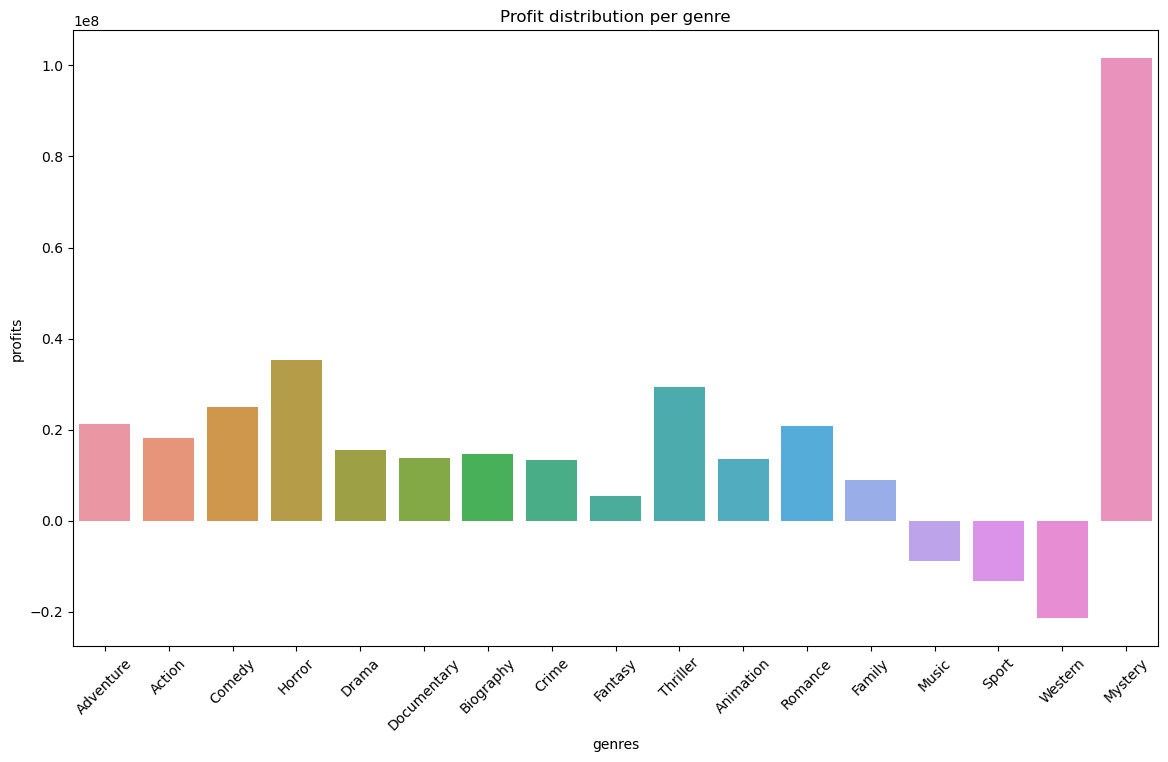

In [97]:
# visualizing the distribution of profits
# using bargraph
plt.figure(figsize=(14,8))
sns.barplot(x = 'genres', y = 'profits', data = movies_1 , ci= None)
plt.title('Profit distribution per genre')
plt.xlabel('genres')
plt.xticks(rotation=45 )
plt.ylabel('profits')

Lets do the production of movie budget and the genre. in production the cost differs with the genre for example animation is cheaper compared to adventure. 

In [98]:
# Calculate the average production per genre
movies_2 = movies_1.groupby('genres')['production_budget'].mean().reset_index()

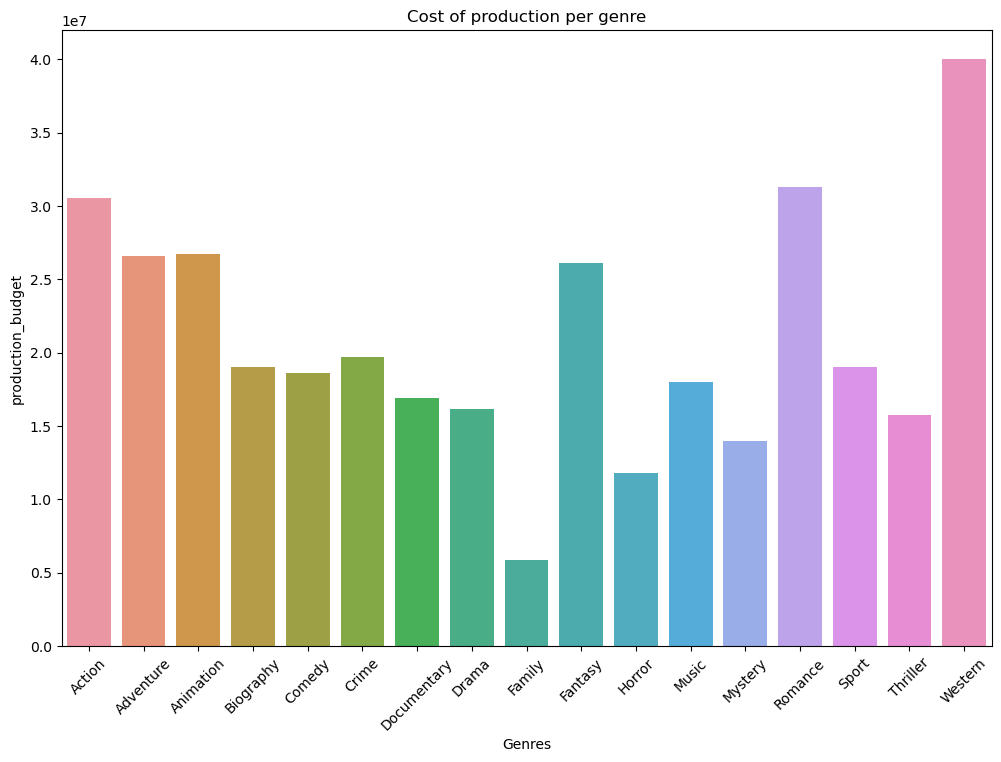

In [99]:
# ploting  bargraph
plt.figure(figsize=(12,8))
sns.barplot(x = 'genres', y = 'production_budget', data = movies_2)
plt.title('Cost of production per genre')
plt.xlabel('Genres')
plt.xticks(rotation=45)
plt.ylabel('production_budget')
plt.show()

Lets do the production of movie budget and the genre. in production the cost differs with the genre for example animation is cheaper compared to adventure. 

### Define X and Y
importing linear regression libraries, we want to see the relationship between the domestic_gross and worldwide gross if they have any relationship

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [101]:
# performing a simple linear regression
X = movies_1['domestic_gross_y']
y = movies_1['worldwide_gross']
# Add a constant to the independent variable
X = sm.add_constant(X)
# Perform linear regression
model = sm.OLS(y, X).fit()
#summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        worldwide_gross   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     2630.
Date:                Mon, 07 Oct 2024   Prob (F-statistic):          3.11e-278
Time:                        13:15:28   Log-Likelihood:                -17621.
No. Observations:                 970   AIC:                         3.525e+04
Df Residuals:                     968   BIC:                         3.526e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7.445e+06   8.73e+05  

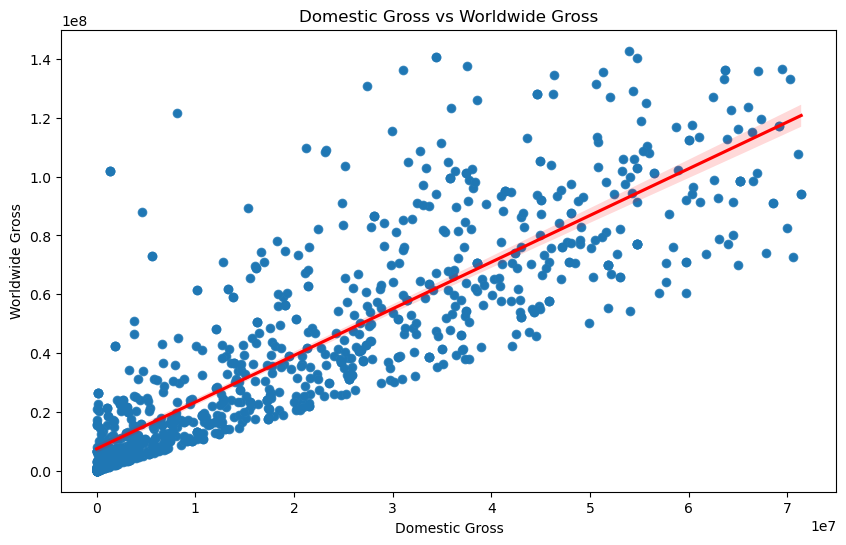

In [102]:
# Scatter plot to visualize the relationshipand a regression plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='domestic_gross_y', y='worldwide_gross', data=movies_1)
sns.regplot(x='domestic_gross_y', y='worldwide_gross', data=movies_1, line_kws={'color': 'red'})
plt.title('Domestic Gross vs Worldwide Gross')
plt.xlabel('Domestic Gross')
plt.ylabel('Worldwide Gross')
plt.show()

### Recommedations
1. Profitable Genre - Voice of kenya should focus more on production of mystery genre movie. This genre has earned about 100m in a period of 8 years.  Voice of Kenya should also venture in producing adventure, action, comedy, horror, and thriller films. These genres offer a balance of manageable profitability, making them the most strategic investment for achieving strong and wide market.

3. Cost of production - This is a key aspect. For example producing the western genre is very costly yet it is not profitable at all. In our data it shows that the cost of production of the thriller is not very high but it gives the best profit Based on the analysis of production costs per genre. Producing Horror, Comedy, and Thriller films, which offer a good balance of moderate production costs and high profitability.

4. Using the linear regression model, it show that there is a positive linear relationship between domestic and worldwide gross. The strong positive linear relationship between Domestic Gross and Worldwide Gross suggests that movies performing well domestically tend to also perform well internationally. Invest in genres and film types that have historically performed well domestically. Focus on marketing strategies to boost domestic performance, as it is a strong predictor of worldwide success

### Conclusion
Voice of Kenya should focus on producing Mystery, Adventure, Action, Comedy, Horror, and Thriller films for optimal profitability and market reach. Emphasize cost-effective genres like Thriller, Horror, and Comedy. Leverage the strong positive relationship between domestic and worldwide gross by enhancing domestic performance through strategic marketing. Avoid high-cost, low-profit genres like Western.